### Implementing simple Chatbot using LangGraph

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [10]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [8]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o-mini", temperature=0)
print(llm.invoke("Hello"))

content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CClb6hERrPBBh988kJ0vM2XFYQrCq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--6fe15fe3-3034-41a4-a02b-cddd035d90b4-0' usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [15]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model = "qwen/qwen3-32b")
print(llm_groq.invoke("Hello"))

content='<think>\nOkay, the user said "Hello". I should respond in a friendly and welcoming way. Let me make sure to keep it open-ended so they feel comfortable to ask anything. Maybe add an emoji to keep it approachable. Let me check for any typos. All looks good. Ready to respond.\n</think>\n\nHi! How can I assist you today? 😊' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 9, 'total_tokens': 86, 'completion_time': 0.194561054, 'prompt_time': 0.006782747, 'queue_time': 0.053120282, 'total_time': 0.201343801}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--1bc70fd1-5109-41a9-8e4a-8e674e83b33e-0' usage_metadata={'input_tokens': 9, 'output_tokens': 77, 'total_tokens': 86}


### Lets create Nodes now

In [17]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

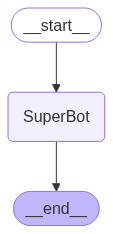

In [18]:
graph = StateGraph(State)

### Node
graph.add_node("SuperBot", superbot)
#Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()

# Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
### Invocation
graph_builder.invoke({'messages':"Hi, My name is Tejas and I like Cricket"})

{'messages': [HumanMessage(content='Hi, My name is Tejas and I like Cricket', additional_kwargs={}, response_metadata={}, id='6f37412c-b1f5-48c3-9501-cdae7ebaed59'),
  AIMessage(content="<think>\nOkay, the user's name is Tejas, and he likes cricket. I need to respond in a friendly way. I should start by greeting him with his name and acknowledge his interest in cricket. I can ask a follow-up question to keep the conversation going, like asking if he plays cricket or follows a particular team. That way, he can expand more on his interests. I should keep the tone positive and engaging. Let me make sure the response is concise and not too long. Also, check for any grammar mistakes. Alright, that should cover it.\n</think>\n\nHello Tejas! Nice to meet you. 🏏 Cricket is an amazing sport—I’d love to hear more about what you enjoy most about it! Do you follow a particular team or player, or maybe play yourself?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16

### Streaming the responses

In [26]:
for event in graph_builder.stream({"messages":"Hello my name is Tejas"}, stream_mode="values"):
    print(event['messages'])

[HumanMessage(content='Hello my name is Tejas', additional_kwargs={}, response_metadata={}, id='6936f91e-545d-4566-aee2-0ceb7e1a1306')]
[HumanMessage(content='Hello my name is Tejas', additional_kwargs={}, response_metadata={}, id='6936f91e-545d-4566-aee2-0ceb7e1a1306'), AIMessage(content="<think>\nOkay, the user introduced themselves as Tejas. I should acknowledge their name and offer assistance. Let me make sure to respond warmly and invite them to ask any questions or share what's on their mind. Keep it friendly and open-ended.\n</think>\n\nHello Tejas! Nice to meet you. 😊 How can I assist you today? Feel free to ask any questions or share what's on your mind!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 14, 'total_tokens': 99, 'completion_time': 0.160559453, 'prompt_time': 0.011715168, 'queue_time': 0.049569132, 'total_time': 0.172274621}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': '